In [1]:
FILENAME = "S1_deiso_top2_fp_all_CSMs.xlsx"
CROSSLINKER_NAME = "DSG"
CROSSLINKER_MASS = 96.0211293726
MODIFICATIONS = {"Carbamidomethyl": 57.021464, "Oxidation": 15.994915}
PROTON_MASS = 1.007276466812

In [2]:
import pandas as pd
from pyteomics import mass
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(FILENAME)
data.head()

,Checked,Sequence,Crosslinker,Crosslink Type,Crosslink Strategy,m/z [Da],Charge,MH+ [Da],First Scan,RT [min],...,B in protein,Score Alpha,Score Beta,Combined Score,Alpha T/D,Beta T/D,Matched Ions A,Search Space A,Matched Ions B,Search Space B
0,False,KWIFGR-MIEADKK,DSG,Inter,MS Annika,434.736023,4,1735.922262,5104,26.6824,...,0,26.00,27.19,26.00,T,T,1,10,1,167
1,False,SAGKAHK-GTNEMSMKK,DSG,Inter,MS Annika,617.627930,3,1850.869236,5954,28.9383,...,278,81.70,27.93,27.93,T,T,2,16,1,33
2,False,KNFEK-CEWKNMADEK,DSG,Inter,MS Annika,690.980896,3,2070.928135,6407,29.9948,...,72,20.76,21.77,20.76,T,T,1,126,1,19
3,False,LGDKR-AVDTDYIKK,DSG,Inter,MS Annika,434.735931,4,1735.921896,7061,31.3847,...,61,26.46,31.35,26.46,T,D,1,217,0,111
4,False,KTQEGK-KIFGGICR,DSG,Inter,MS Annika,434.735535,4,1735.920309,7388,32.1014,...,50,20.52,19.33,19.33,T,T,1,137,1,146


In [4]:
def calculate_mass_error(row: pd.Series) -> float:
    pep_a = str(row["Sequence A"]).strip()
    mass_a = mass.calculate_mass(sequence = pep_a)
    pep_b = str(row["Sequence B"]).strip()
    mass_b = mass.calculate_mass(sequence = pep_b)
    mods_a = [str(mod).strip().split("(")[1].split(")")[0].strip() for mod in str(row["Modifications A"]).split(";")]
    mod_masses_a = sum([MODIFICATIONS[mod] if mod in MODIFICATIONS else 0.0 for mod in mods_a])
    mods_b = [str(mod).strip().split("(")[1].split(")")[0].strip() for mod in str(row["Modifications B"]).split(";")]
    mod_masses_b = sum([MODIFICATIONS[mod] if mod in MODIFICATIONS else 0.0 for mod in mods_b])
    theoretical = mass_a + mod_masses_a + mass_b + mod_masses_b + CROSSLINKER_MASS
    experimental = float(row["m/z [Da]"]) * float(row["Charge"]) - float(row["Charge"]) * PROTON_MASS
    return ((experimental - theoretical) / theoretical) * 1000000

In [5]:
data["MS1 Mass Error [ppm]"] = data.apply(lambda row: calculate_mass_error(row), axis = 1)

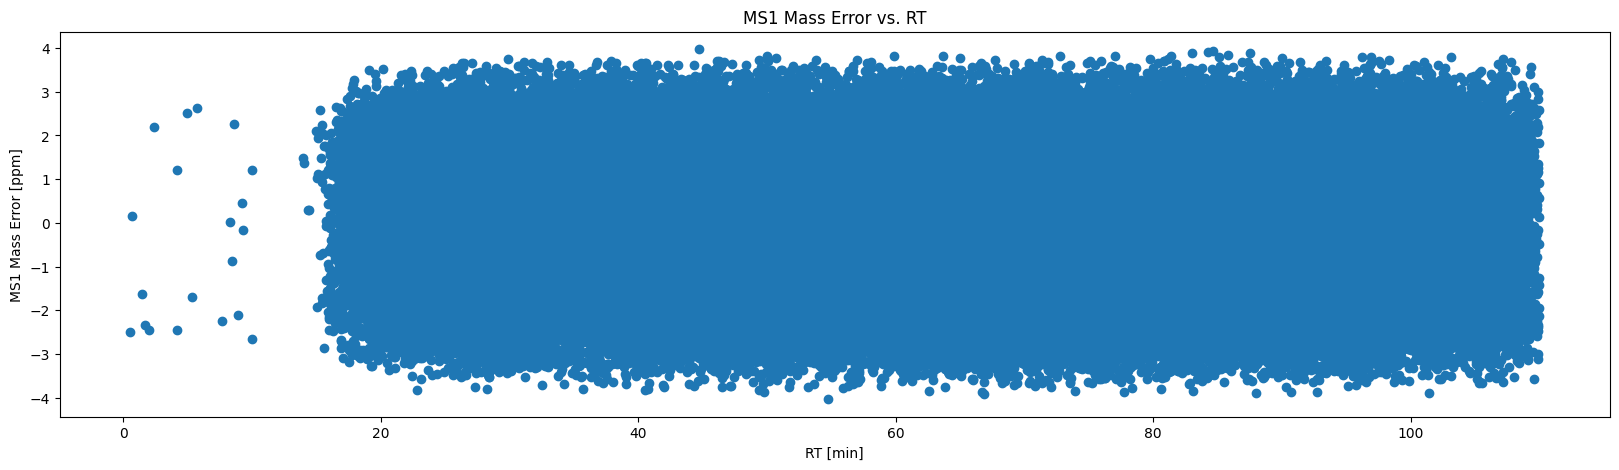

In [8]:
fig = plt.figure(figsize = (20, 5))
plt.scatter(data["RT [min]"], data["MS1 Mass Error [ppm]"])
plt.xlabel("RT [min]")
plt.ylabel("MS1 Mass Error [ppm]")
plt.title("MS1 Mass Error vs. RT")
plt.show()